In [1]:
#%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim  as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Training and Test Datasets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# trainloader put the training set into batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



100%|██████████| 170498071/170498071 [00:05<00:00, 33086361.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


 deer  frog  deer plane


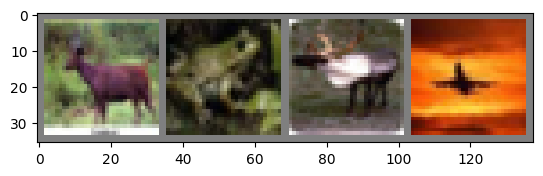

In [3]:
# Running a check on the output from DataLoader:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
  img = img / 2 + 0.5 # Unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
#  If you pass an iterable object (like a list, tuple, or string) to iter(), it returns an iterator for that object.
#  This allows you to iterate over the elements of the iterable using a loop, such as a for loop.
# Here, my_iter is an iterator over my_list, and next() is used to get the next element from the iterator.
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
# Next is the Model we will train on. It is similar to LeNet (adopted for 3-color images)

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # (in_channel, out_channel, kernel_size (filter))
    self.pool = nn.MaxPool2d(2,2 )
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x= self.fc3(x)
    return x


net = Net()


###     Contiguity:
        view(): Requires the tensor to be contiguous. If the tensor is not contiguous, you must call contiguous() before using view().
        reshape(): Does not require the tensor to be contiguous and will create a copy if necessary.

    Performance:
        view(): Generally more efficient if the tensor is already contiguous since it doesn't need to create a copy.
        reshape(): Can handle both contiguous and non-contiguous tensors but might be less efficient for non-contiguous tensors because it may need to create a copy.

    Flexibility:
        view(): Less flexible due to the contiguity requirement.
        reshape(): More flexible as it automatically handles both contiguous and non-contiguous tensors.

In [5]:
# Final ingredients we need is a loss function and an optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

The loss function, as previously mentioned in this video, quantifies how far the model's prediction deviates from our desired output. Cross-entropy loss stands out as a common choice for classification models like the one we're using.

The optimizer is pivotal in driving the learning process. Here, we've designed an optimizer that employs stochastic gradient descent, a fairly straightforward optimization technique. In addition to the algorithm's parameters such as the learning rate (lr) and momentum, we provide net.parameters(), encompassing all the model's learning weights, for the optimizer to adjust.

Lastly, these components are integrated into the training loop.

Overall Workflow

    Forward Pass: Compute predicted outputs.
    Compute Loss: Calculate loss between predictions and actual labels.
    Backward Pass (Gradient Computation): Compute gradients of loss w.r.t. parameters.
    Optimization (Update Parameters): Update parameters based on computed gradients to minimize the loss.

In [11]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data

    # zero the parameter gradient
    optimizer.zero_grad()

    # forward+backward+optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss  += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')





/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[1,  2000] loss: 2.240
[1,  4000] loss: 1.941
[1,  6000] loss: 1.745
[1,  8000] loss: 1.625
[1, 10000] loss: 1.533
[1, 12000] loss: 1.450


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[2,  2000] loss: 1.403
[2,  4000] loss: 1.363
[2,  6000] loss: 1.343
[2,  8000] loss: 1.293
[2, 10000] loss: 1.284
[2, 12000] loss: 1.271
Finished Training


    torch.no_grad() is a context manager that temporarily disables gradient calculation (i.e., no gradient computations are performed within this block). This is used during inference to reduce memory usage and speed up computations since gradients are not needed for predictions.
    The loop iterates over batches of data in testloader, which presumably contains test samples.
    For each batch, it performs inference (outputs = net(images)) to get the model's predictions (outputs).
    torch.max(outputs.data, 1) finds the index of the maximum value along dimension 1, which corresponds to the predicted class for each sample.
    total += labels.size(0) increments total by the number of samples in the current batch.
    (predicted == labels).sum().item() calculates the number of correctly classified samples in the batch and adds it to correct.

In [12]:
# Evaluating on the test dataset

correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' %(100*correct/total))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Accuracy of the network on the 10000 test images: 56 %
